In [1]:
import time
import random
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import uuid

In [2]:
#reference: https://jrtechs.net/data-science/implementing-a-quadtree-in-python

## Node class

In [3]:
# Node class is a rectangle in the quardtree
# with (x0, y0) as coordinates, w as width, h as height
class Node():
    def __init__(self, x0, y0, w, h):
        self.x0 = x0
        self.y0 = y0
        self.width = w
        self.height = h
        self.children = []
        # the unique id for each node
        self.id = uuid.uuid4().hex[:4]

    def get_location(self):
        return (self.x0, self.yo)
    
    def get_width(self):
        return self.width
    
    def get_height(self):
        return self.height
    
    def get_children(self):
        return self.children

In [19]:
# Method about find the children and parents
# FIND the dictionary of all nodes that can be divide(the leaf)
def find_children(node):
    if not node.children:
        return [node]
    else:
        children = []
        for child in node.children:
            children +=(find_children(child))
    return children

# FIND the dictionary of all nodes that can be fuse(the parent)
def find_parents(node):
    if len(node.children) != 4:
        return []
    else: 
        parent = [node]
        for child in node.children:
            parent += find_parents(child)
        return parent

## QTree class

In [5]:
# QTree class which can do the divide and graph of quardtree
class QTree():
    def __init__(self):
        self.root = Node(0, 0, 10, 10)
    def subdivide(self, node):
        w_ = float(node.width/2)
        h_ = float(node.height/2)
        x1 = Node(node.x0, node.y0, w_, h_)
        x2 = Node(node.x0, node.y0+h_, w_, h_)
        x3 = Node(node.x0 + w_, node.y0, w_, h_)
        x4 = Node(node.x0+w_, node.y0+h_, w_, h_)
        node.children = [x1, x2, x3, x4]
    def weld(self, node):
        node.children = []
    def graph(self):
        fig, ax = plt.subplots(figsize=(20, 10))
        plt.title("Quadtree")
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 10)
        c = find_children(self.root)
        print("Number of segments: %d" %len(c))
        areas = set()
        for el in c:
            areas.add(el.width*el.height)
        print("Minimum segment area: %.3f units" %min(areas))
        for n in c:
            #print((n.x0, n.y0), n.width, n.height)
            rect = patches.Rectangle((n.x0, n.y0), n.width, n.height, fill=False)
            ax.add_patch(rect)
        patches_list = ax.patches
        plt.show()

## Example

Number of segments: 16
Minimum segment area: 1.562 units


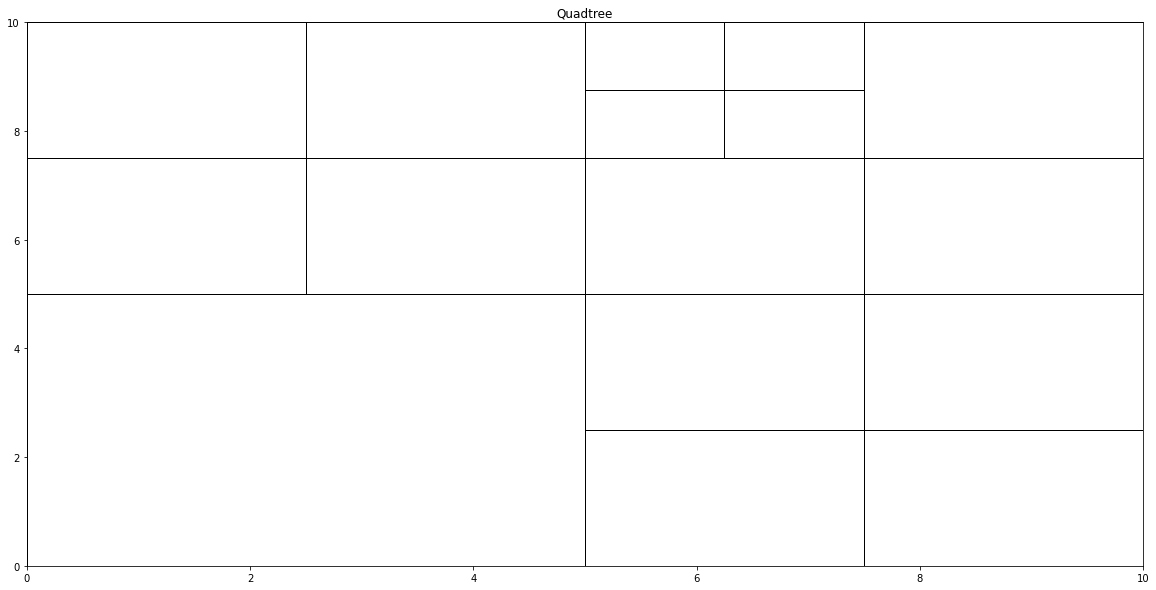

In [31]:
import random
# example of using QTreee 
quard = QTree()

# Divide random times between 0 and 5
for i in range(random.randint(0,5)):
    # Divide random parent node
    quard.subdivide(find_children(quard.root)[random.randint(0,len(find_children(quard.root))-1)])

# Weld random times between 0 and 4
for i in range(random.randint(0,4)):
    # Weld random child node to a parent node
    if len(find_parents(quard.root)) == 1:
        break
    quard.weld(find_parents(quard.root)[random.randint(0,len(find_parents(quard.root))-1)])
           
quard.graph() 

In [7]:
t = 0
N = 1
for i in range(1,10):
    t+= random.expovariate(15)
    print (N, t)

1 0.07413793258012338
1 0.12440709343244731
1 0.2538095440283613
1 0.30777001061806053
1 0.3360477220323094
1 0.36043757264419446
1 0.36700088501050715
1 0.474245013303066
1 0.5226824927612549


## Visualization (not required)

In [8]:
# sudo apt install -y graphviz
# pip3 install graphviz
from graphviz import Graph, Digraph

In [16]:
# FIND the dictionary of all nodes id that can be divide(the leaf)
def find_children_id(node):
    if not node.children:
        return [node.id]
    else:
        children = []
        for child in node.children:
            children +=(find_children_id(child))
    return children

# FIND the dictionary of all nodes id that can be fuse(the parent)
def find_parents_id(node):
    if len(node.children) != 4:
        return []
    else: 
        parent = [node.id]
        for child in node.children:
            parent += find_parents_id(child)
        return parent

In [11]:
# draw the nodes in a tree graph
def tree_graph(node, g):
    if node.children == []:
        return g
    for child in node.children:
        g.edge(node.id, child.id)
        tree_graph(child, g)
    return g

['c729', '14f2', 'b4a4', '2166', '810e', 'eb13', 'ed79', '08db', 'f6e4', '532b']
['7045', '5c42', 'dc81']


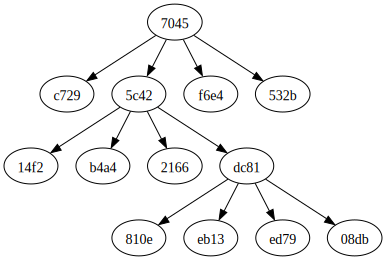

In [17]:
quard = QTree()
g = Digraph()
# Divide the quard tree first time
quard.subdivide(quard.root)
for i in range(random.randint(0,5)):
    quard.subdivide(find_children(quard.root)[random.randint(0,len(find_children(quard.root))-1)])
print(find_children_id(quard.root))
print(find_parents_id(quard.root))
tree_graph(quard.root, g)